In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Configurações para os gráficos do Seaborn
sns.set_theme(style="whitegrid")
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
# Carrega o dataset de gorjetas
df = sns.load_dataset('tips')

# Exibe as 5 primeiras linhas para entender a estrutura
print("Amostra dos dados:")
df.head()

Amostra dos dados:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Calculando algumas métricas simples
valor_total_contas = df['total_bill'].sum()
gorjeta_media = df['tip'].mean()
dia_mais_movimentado = df['day'].mode()[0]

print(f"Valor Total das Contas: R$ {valor_total_contas:.2f}")
print(f"Gorjeta Média: R$ {gorjeta_media:.2f}")
print(f"Dia Mais Movimentado: {dia_mais_movimentado}")

Valor Total das Contas: R$ 4827.77
Gorjeta Média: R$ 3.00
Dia Mais Movimentado: Sat


/tmp/ipykernel_1048397/3935002763.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_1048397/3935002763.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




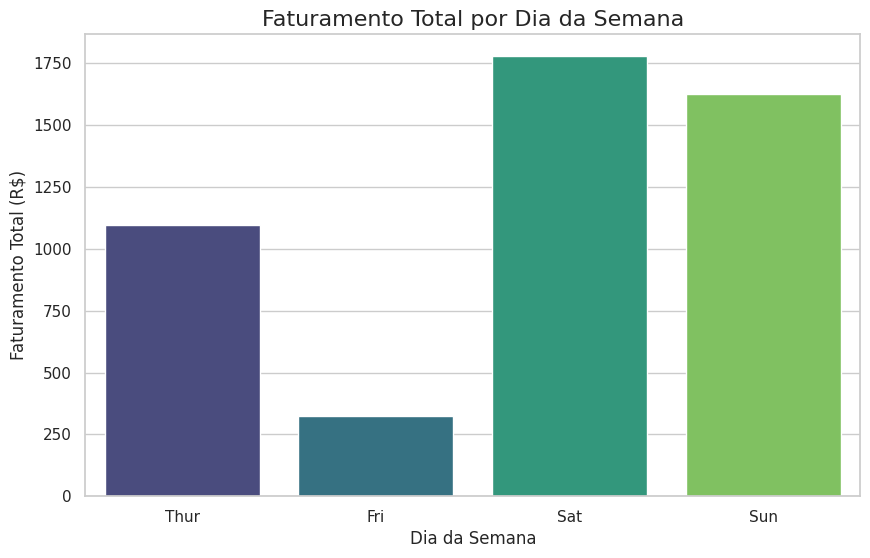

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='total_bill', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Faturamento Total por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana')
plt.ylabel('Faturamento Total (R$)')

# Salva a figura para usar no relatório
plt.savefig('grafico_faturamento_dia.png', dpi=300) # dpi=300 para alta qualidade
plt.show()

In [ ]:
fig = px.scatter(
    df,
    x='total_bill',
    y='tip',
    color='smoker',
    facet_col='sex',
    size='size',
    title='Relação entre Valor da Conta e Gorjeta (Separado por Sexo e Fumante)',
    labels={'total_bill': 'Valor Total da Conta (R$)', 'tip': 'Gorjeta (R$)'}
)

fig.show()

In [ ]:
# Cria uma tabela resumo com a média de gastos por dia e período
resumo_por_dia = df.groupby(['day', 'time']).agg(
    gasto_medio=('total_bill', 'mean'),
    gorjeta_media=('tip', 'mean')
).reset_index()

resumo_por_dia = resumo_por_dia.round(2) # Arredonda para 2 casas decimais

print("Tabela Resumo:")
resumo_por_dia

Tabela Resumo:


/tmp/ipykernel_1048397/857375184.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,day,time,gasto_medio,gorjeta_media
0,Thur,Lunch,17.66,2.77
1,Thur,Dinner,18.78,3.00
2,Fri,Lunch,12.85,2.38
3,Fri,Dinner,19.66,2.94
4,Sat,Lunch,NaN,NaN
5,Sat,Dinner,20.44,2.99
6,Sun,Lunch,NaN,NaN
7,Sun,Dinner,21.41,3.26


In [ ]:
from export import VisualReport

report = VisualReport()
report.generate_report("jn-test.ipynb", "output/jn-test.html")

Lendo o notebook: jn-test.ipynb
Carregando template...
Usando template padrão: templates/template1.html
Relatório salvo com sucesso em: output/jn-test.html


In [ ]:
from export_linear import generate_report

generate_report("jn-test.ipynb", "templates/template1.html", "output/jn-test-linear.html")

Lendo o notebook: jn-test.ipynb
Renderizando o template...
Relatório salvo com sucesso em: output/jn-test-linear.html


In [ ]:
from export2 import VisualReport2

report2 = VisualReport2()
report2.generate_report("jn-test.ipynb", "output/jn-test2.html")


Lendo o notebook: jn-test.ipynb
Carregando template...
Usando template padrão: templates/template1.html
Relatório salvo com sucesso em: output/jn-test2.html
